In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import re
import matplotlib.patches as patches
import matplotlib

In [2]:
data = pd.read_csv("Tarkari.csv", low_memory=False)
data.head()

,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,Tomato Small(Local),6/16/2013,Kg,26,32,29
2,Potato Red,6/16/2013,Kg,20,21,20.5
3,Potato White,6/16/2013,Kg,15,16,15.5
4,Onion Dry (Indian),6/16/2013,Kg,28,30,29


In [3]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.dtypes

Commodity            object
Date         datetime64[ns]
Unit                 object
Minimum              object
Maximum              object
Average              object
dtype: object

In [6]:
pattern = r"^Rs\s+"
data["Minimum"] = pd.to_numeric(data["Minimum"].apply(lambda x: x if not str(x).startswith("Rs") else re.sub(pattern,"",str(x))))
data["Maximum"] = pd.to_numeric(data["Maximum"].apply(lambda x: x if not str(x).startswith("Rs") else re.sub(r"^Rs\s+", "",str(x))))
data["Average"] = pd.to_numeric(data["Average"].apply(lambda x: x if not str(x).startswith("Rs") else re.sub(r"^Rs\s+", "", str(x))))

In [7]:
selected_commodities = ['Onion Dry (Indian)', 'Tomato Big(Nepali)', 'Potato White', 'Carrot(Local)', 'Apple(Jholey)', 'Banana', 'Cucumber(Local)', 'Garlic Dry Nepali', 'Lettuce']
selected_data = data[data['Commodity'].isin(selected_commodities)].copy()

In [49]:
selected_data.head()

,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0
5,Carrot(Local),2013-06-16,Kg,30.0,35.0,32.5
40,Lettuce,2013-06-16,Kg,55.0,60.0,57.5


In [8]:
selected_data.loc[:, 'Season'] = selected_data['Date'].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})

In [9]:
selected_data

,Commodity,Date,Unit,Minimum,Maximum,Average,Season
0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.50,Summer
3,Potato White,2013-06-16,Kg,15.0,16.0,15.50,Summer
4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.00,Summer
5,Carrot(Local),2013-06-16,Kg,30.0,35.0,32.50,Summer
40,Lettuce,2013-06-16,Kg,55.0,60.0,57.50,Summer
...,...,...,...,...,...,...,...
280800,Cucumber(Local),2023-09-28,KG,60.0,70.0,65.00,Fall
280808,Garlic Dry Nepali,2023-09-28,KG,250.0,260.0,256.67,Fall
280816,Lettuce,2023-09-28,KG,90.0,100.0,96.67,Fall
280826,Onion Dry (Indian),2023-09-28,KG,70.0,74.0,71.60,Fall


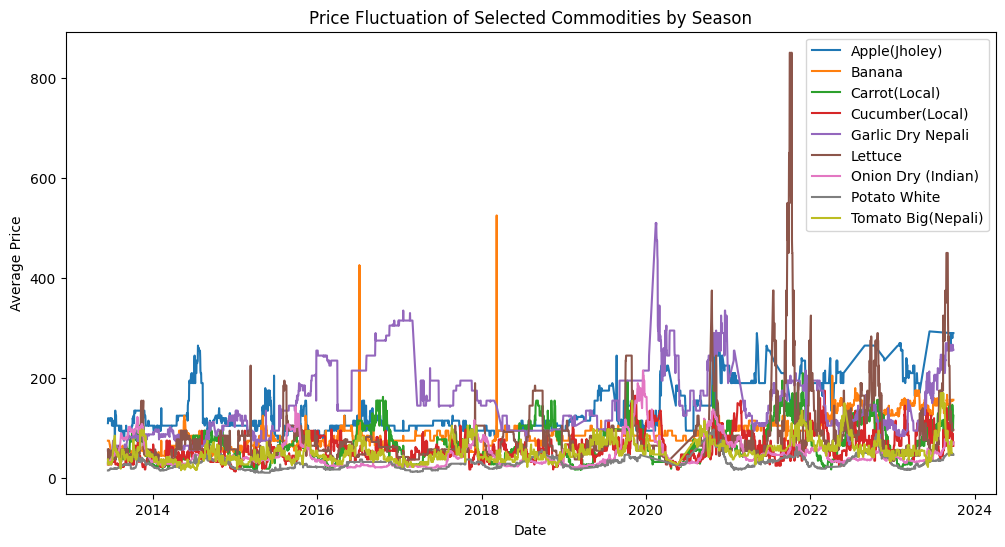

In [17]:
plt.figure(figsize=(12, 6))
for commodity, commodity_data in selected_data.groupby('Commodity'):
    plt.plot(commodity_data['Date'], commodity_data['Average'], label=commodity)

plt.title('Price Fluctuation of Selected Commodities by Season')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.savefig('plot1.png')
plt.show()


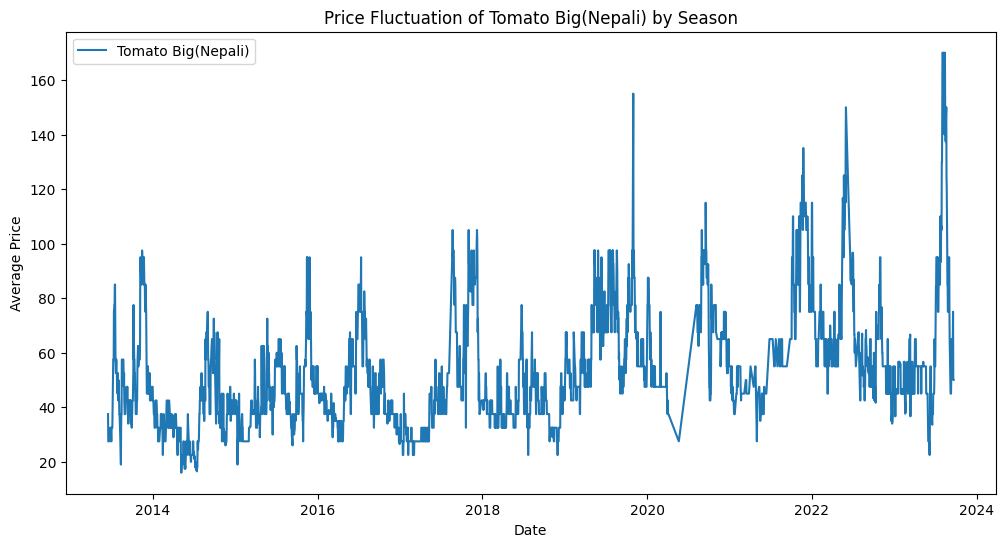

In [11]:
commodity_to_plot = 'Tomato Big(Nepali)'

commodity_data = selected_data[selected_data['Commodity'] == commodity_to_plot]

plt.figure(figsize=(12, 6))
plt.plot(commodity_data['Date'], commodity_data['Average'], label=commodity_to_plot)

plt.title(f'Price Fluctuation of {commodity_to_plot} by Season')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

C:\Users\nirvi\AppData\Local\Temp\ipykernel_17004\3941260413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_data_2023['Percentage Change'] = commodity_data_2023['Average'].pct_change() * 100


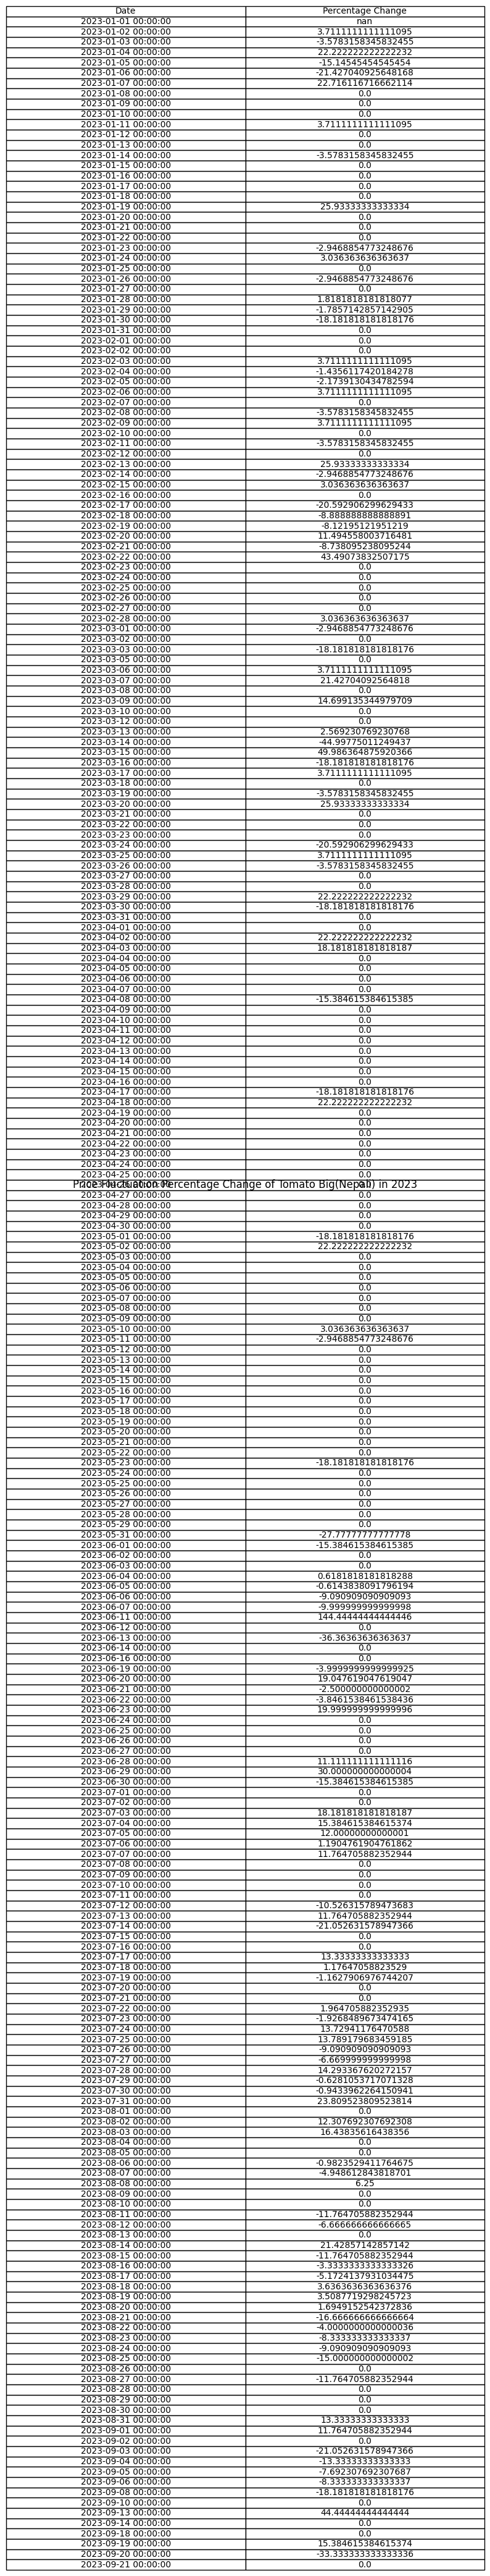

In [17]:
commodity_to_analyze = 'Tomato Big(Nepali)'

commodity_data = selected_data[selected_data['Commodity'] == commodity_to_analyze]

commodity_data_2023 = commodity_data[(commodity_data['Date'] >= '2023-01-01') & (commodity_data['Date'] <= '2023-9-28')]

commodity_data_2023['Percentage Change'] = commodity_data_2023['Average'].pct_change() * 100

fig, ax = plt.subplots(figsize=(10, 4)) 
ax.axis('off')
table = ax.table(cellText=commodity_data_2023[['Date', 'Percentage Change']].values,
                 colLabels=['Date', 'Percentage Change'],
                 cellLoc = 'center',
                 loc='center')

plt.title(f'Price Fluctuation Percentage Change of {commodity_to_analyze} in 2023')
plt.show()

In [15]:
commodity_to_analyze = 'Tomato Big(Nepali)'

commodity_data = selected_data[selected_data['Commodity'] == commodity_to_analyze]
commodity_data_2023 = commodity_data[(commodity_data['Date'] >= '2023-01-01') & (commodity_data['Date'] <= '2023-9-28')]

percentage_change_2023 = commodity_data_2023['Average'].pct_change() * 100

percentage_change_2023.dropna(inplace=True)

# Calculate the average percentage change for 2023
average_percentage_change_2023 = percentage_change_2023.mean()

print(f'The average percentage change for {commodity_to_analyze} in 2023 is: {average_percentage_change_2023:.2f}%')


The average percentage change for Tomato Big(Nepali) in 2023 is: 0.91%


In [22]:
percentage_change_2023.dropna(inplace=True)

In [8]:
selected_data

,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
3,Potato White,6/16/2013,Kg,15,16,15.5
4,Onion Dry (Indian),6/16/2013,Kg,28,30,29
5,Carrot(Local),6/16/2013,Kg,30,35,32.5
40,Lettuce,6/16/2013,Kg,55,60,57.5
...,...,...,...,...,...,...
280800,Cucumber(Local),9/28/2023,KG,Rs 60.00,Rs 70.00,Rs 65.00
280808,Garlic Dry Nepali,9/28/2023,KG,Rs 250.00,Rs 260.00,Rs 256.67
280816,Lettuce,9/28/2023,KG,Rs 90.00,Rs 100.00,Rs 96.67
280826,Onion Dry (Indian),9/28/2023,KG,Rs 70.00,Rs 74.00,Rs 71.60


In [9]:
selected_data.to_csv('preprocessed_data.csv', index=False)

In [20]:
!pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ---- -------------------------------- 30.7/250.0 kB 435.7 kB/s eta 0:00:01
     ------ ------------------------------ 41.0/250.0 kB 393.8 kB/s eta 0:00:01
     ------------- ----------------------- 92.2/250.0 kB 655.4 kB/s eta 0:00:01
     ------------------------------- ------ 204.8/250.0 kB 1.0 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.1 MB/s eta 0:00:00


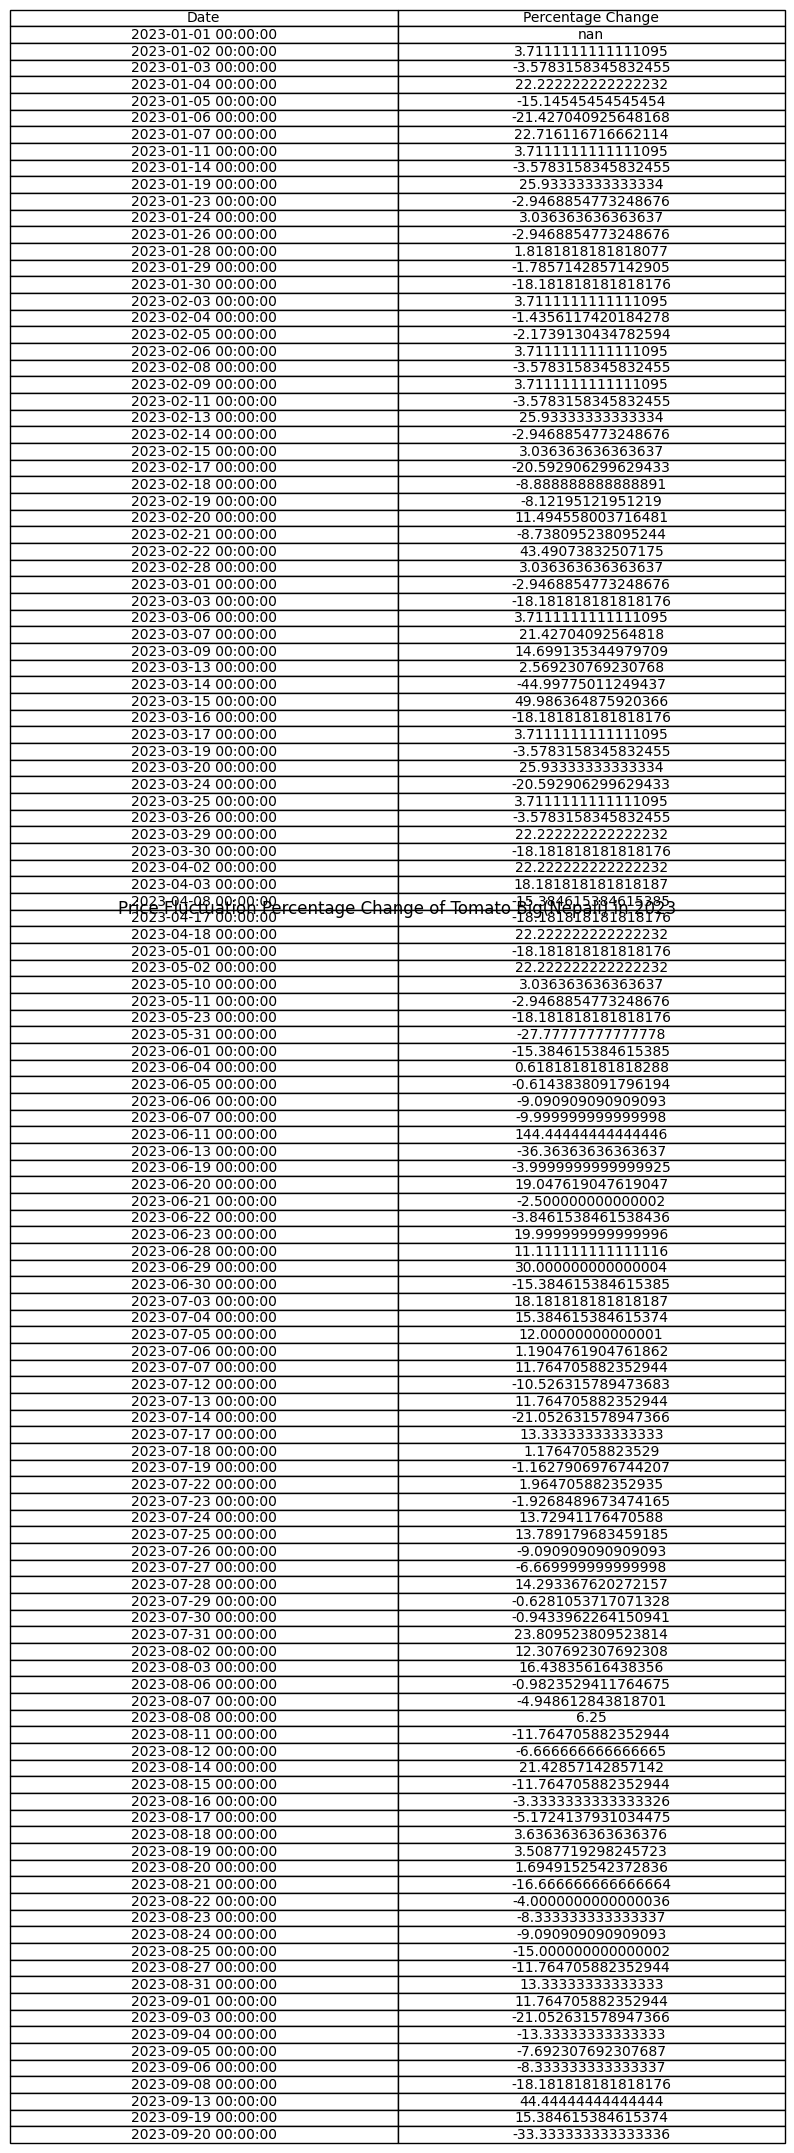

In [24]:
commodity_data_2023 = commodity_data_2023[commodity_data_2023['Percentage Change'] != 0]
fig, ax = plt.subplots(figsize=(10, 4)) 
ax.axis('off')
table = ax.table(cellText=commodity_data_2023[['Date', 'Percentage Change']].values,
                 colLabels=['Date', 'Percentage Change'],
                 cellLoc = 'center',
                 loc='center')

plt.title(f'Price Fluctuation Percentage Change of {commodity_to_analyze} in 2023')
plt.show()

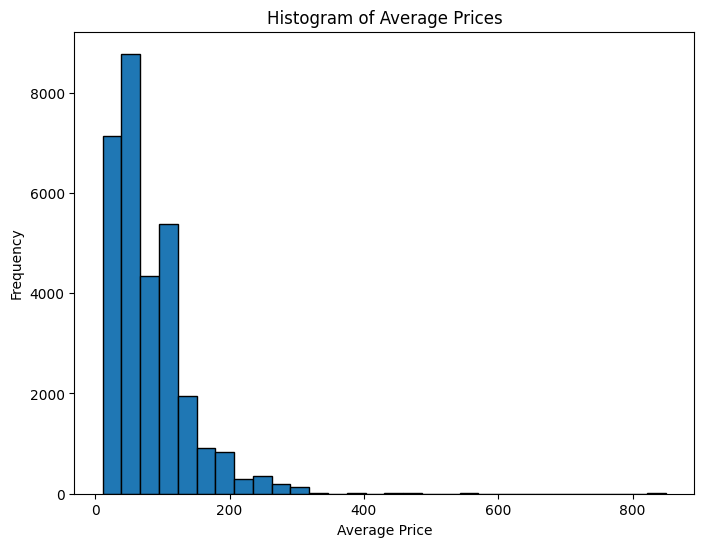

In [10]:
average_prices = selected_data['Average'].dropna()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(average_prices, bins=30, edgecolor='black')
plt.title('Histogram of Average Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

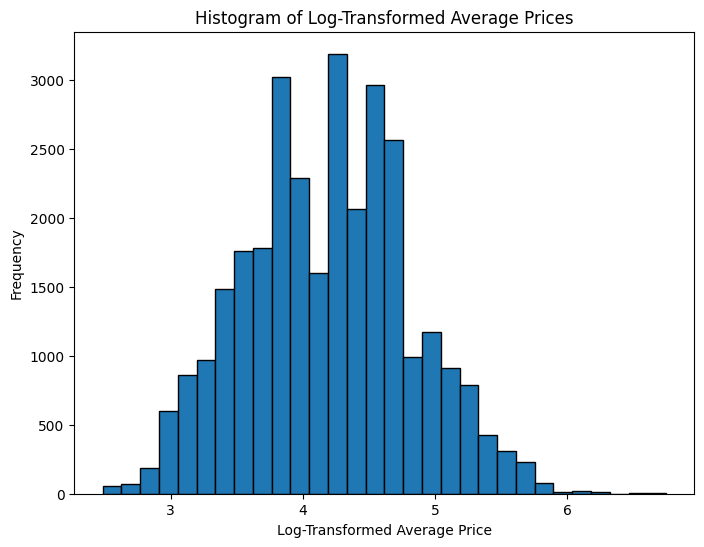

In [11]:
log_average_prices = np.log1p(average_prices)

# Plot histogram after log transformation
plt.figure(figsize=(8, 6))
plt.hist(log_average_prices, bins=30, edgecolor='black')
plt.title('Histogram of Log-Transformed Average Prices')
plt.xlabel('Log-Transformed Average Price')
plt.ylabel('Frequency')
plt.show()

In [59]:
selected_data['Date'] = pd.to_datetime(selected_data['Date'])

# Extract features from the date
selected_data['day'] = selected_data['Date'].dt.day
selected_data['month'] = selected_data['Date'].dt.month
selected_data['year'] = selected_data['Date'].dt.year


In [19]:
selected_data.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Season,day,month,year
0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5,Summer,16,6,2013
3,Potato White,2013-06-16,Kg,15.0,16.0,15.5,Summer,16,6,2013
4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0,Summer,16,6,2013
5,Carrot(Local),2013-06-16,Kg,30.0,35.0,32.5,Summer,16,6,2013
40,Lettuce,2013-06-16,Kg,55.0,60.0,57.5,Summer,16,6,2013


Skewness of Average Price: 2.394561380677116


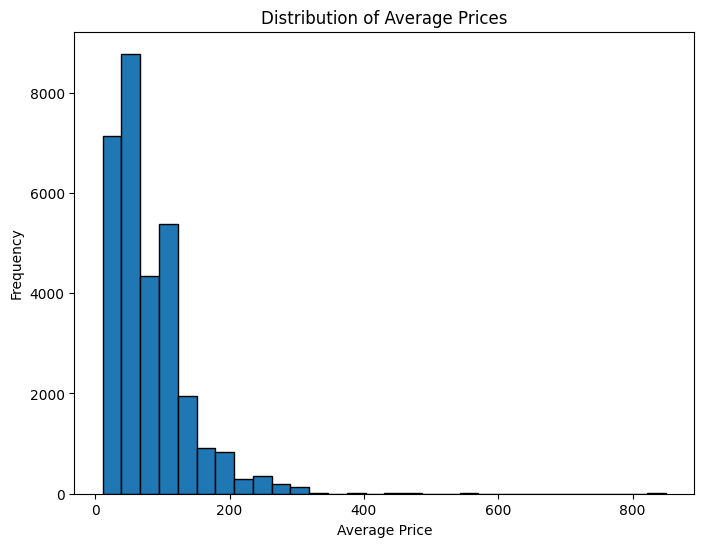

In [51]:
average_skewness = selected_data['Average'].skew()
print(f'Skewness of Average Price: {average_skewness}')

# Plot the distribution of 'Average' prices
plt.figure(figsize=(8, 6))
plt.hist(selected_data['Average'], bins=30, edgecolor='black')
plt.title('Distribution of Average Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

In [52]:
selected_data['log_average'] = np.log1p(selected_data['Average'])

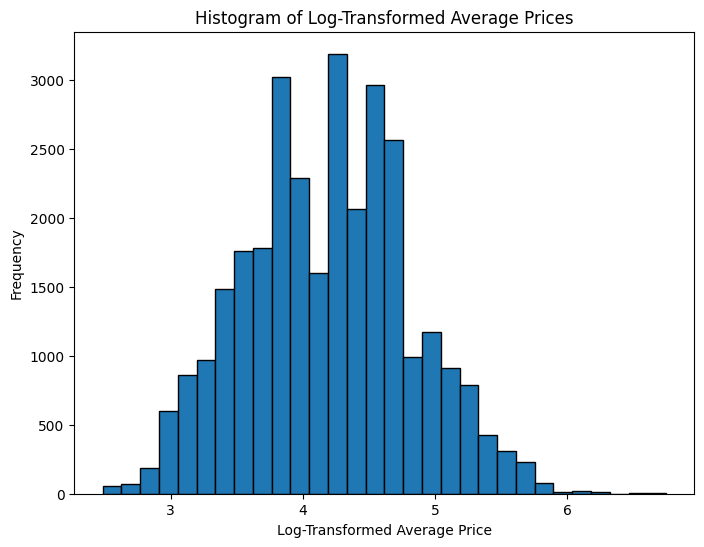

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(selected_data['log_average'], bins=30, edgecolor='black')
plt.title('Histogram of Log-Transformed Average Prices')
plt.xlabel('Log-Transformed Average Price')
plt.ylabel('Frequency')
plt.show()

In [53]:
selected_data.dtypes

Commodity              object
Date           datetime64[ns]
Unit                   object
Minimum               float64
Maximum               float64
Average               float64
Season                 object
log_average           float64
dtype: object

In [54]:
selected_data['Season'] = pd.Categorical(selected_data['Season'])

# Create one-hot encoded columns
season_dummies = pd.get_dummies(selected_data['Season'], prefix='Season')

# Concatenate the one-hot encoded columns with the original DataFrame
selected_data = pd.concat([selected_data, season_dummies], axis=1)

# Drop the original 'season' column if needed
selected_data.drop('Season', axis=1, inplace=True)

# Display the updated DataFrame
print(selected_data.head())


             Commodity       Date Unit  Minimum  Maximum  Average  \
0   Tomato Big(Nepali) 2013-06-16   Kg     35.0     40.0     37.5   
3         Potato White 2013-06-16   Kg     15.0     16.0     15.5   
4   Onion Dry (Indian) 2013-06-16   Kg     28.0     30.0     29.0   
5        Carrot(Local) 2013-06-16   Kg     30.0     35.0     32.5   
40             Lettuce 2013-06-16   Kg     55.0     60.0     57.5   

    log_average  Season_Fall  Season_Spring  Season_Summer  Season_Winter  
0      3.650658        False          False           True          False  
3      2.803360        False          False           True          False  
4      3.401197        False          False           True          False  
5      3.511545        False          False           True          False  
40     4.069027        False          False           True          False  


In [29]:
selected_data.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,day,month,year,log_average,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5,16,6,2013,3.650658,False,False,True,False
3,Potato White,2013-06-16,Kg,15.0,16.0,15.5,16,6,2013,2.803360,False,False,True,False
4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0,16,6,2013,3.401197,False,False,True,False
5,Carrot(Local),2013-06-16,Kg,30.0,35.0,32.5,16,6,2013,3.511545,False,False,True,False
40,Lettuce,2013-06-16,Kg,55.0,60.0,57.5,16,6,2013,4.069027,False,False,True,False


In [55]:
selected_data = pd.get_dummies(selected_data, columns=['Commodity'], drop_first=True)

In [31]:
selected_data.head()

,Date,Unit,Minimum,Maximum,Average,day,month,year,log_average,Season_Fall,...,Season_Summer,Season_Winter,Commodity_Banana,Commodity_Carrot(Local),Commodity_Cucumber(Local),Commodity_Garlic Dry Nepali,Commodity_Lettuce,Commodity_Onion Dry (Indian),Commodity_Potato White,Commodity_Tomato Big(Nepali)
0,2013-06-16,Kg,35.0,40.0,37.5,16,6,2013,3.650658,False,...,True,False,False,False,False,False,False,False,False,True
3,2013-06-16,Kg,15.0,16.0,15.5,16,6,2013,2.803360,False,...,True,False,False,False,False,False,False,False,True,False
4,2013-06-16,Kg,28.0,30.0,29.0,16,6,2013,3.401197,False,...,True,False,False,False,False,False,False,True,False,False
5,2013-06-16,Kg,30.0,35.0,32.5,16,6,2013,3.511545,False,...,True,False,False,True,False,False,False,False,False,False
40,2013-06-16,Kg,55.0,60.0,57.5,16,6,2013,4.069027,False,...,True,False,False,False,False,False,True,False,False,False


In [187]:
selected_data.head()

,Date,Minimum,Maximum,Average,log_average,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Commodity_Banana,Commodity_Carrot(Local),Commodity_Cucumber(Local),Commodity_Garlic Dry Nepali,Commodity_Lettuce,Commodity_Onion Dry (Indian),Commodity_Potato White,Commodity_Tomato Big(Nepali),day,month,year
0,2013-06-16,35.0,40.0,37.5,3.650658,False,False,True,False,False,False,False,False,False,False,False,True,16,6,2013
3,2013-06-16,15.0,16.0,15.5,2.803360,False,False,True,False,False,False,False,False,False,False,True,False,16,6,2013
4,2013-06-16,28.0,30.0,29.0,3.401197,False,False,True,False,False,False,False,False,False,True,False,False,16,6,2013
5,2013-06-16,30.0,35.0,32.5,3.511545,False,False,True,False,False,True,False,False,False,False,False,False,16,6,2013
40,2013-06-16,55.0,60.0,57.5,4.069027,False,False,True,False,False,False,False,False,True,False,False,False,16,6,2013


In [3]:
new_data = pd.read_csv('features.csv')

Skewness of Average Price: 2.394561380677116


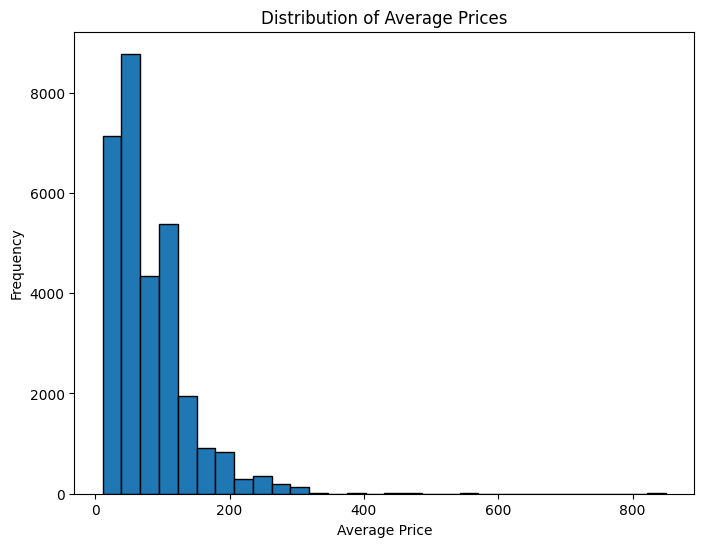

In [4]:
average_skewness = new_data['Average'].skew()
print(f'Skewness of Average Price: {average_skewness}')

# Plot the distribution of 'Average' prices
plt.figure(figsize=(8, 6))
plt.hist(new_data['Average'], bins=30, edgecolor='black')
plt.title('Distribution of Average Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

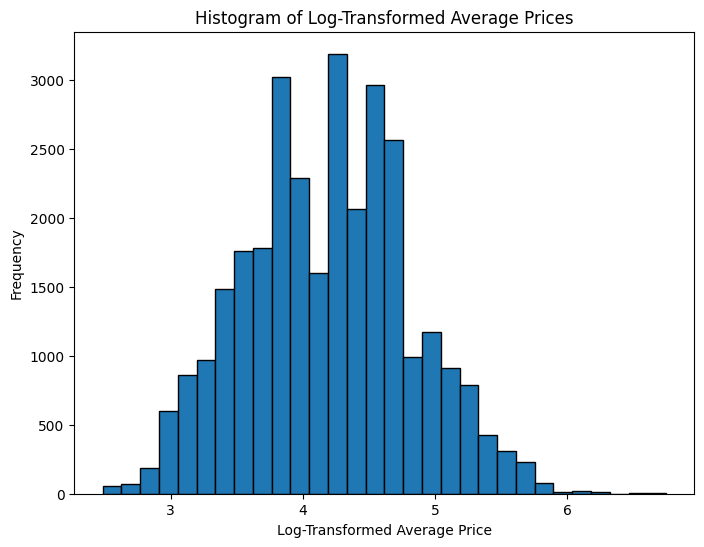

In [6]:
new_data['log_average'] = np.log1p(new_data['Average'])
plt.figure(figsize=(8, 6))
plt.hist(new_data['log_average'], bins=30, edgecolor='black')
plt.title('Histogram of Log-Transformed Average Prices')
plt.xlabel('Log-Transformed Average Price')
plt.ylabel('Frequency')
plt.show()

In [7]:
new_data.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,day,month,year,Season_Fall,Season_Spring,Season_Summer,Season_Winter,log_average
0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5,16,6,2013,False,False,True,False,3.650658
1,Potato White,2013-06-16,Kg,15.0,16.0,15.5,16,6,2013,False,False,True,False,2.803360
2,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0,16,6,2013,False,False,True,False,3.401197
3,Carrot(Local),2013-06-16,Kg,30.0,35.0,32.5,16,6,2013,False,False,True,False,3.511545
4,Lettuce,2013-06-16,Kg,55.0,60.0,57.5,16,6,2013,False,False,True,False,4.069027


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming your target variable is 'Average'
# features: X, target: y
X = new_data[['Minimum','Maximum','log_average']] # Adjust features as needed
y = new_data['Average']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SyntaxError: invalid syntax (4004452921.py, line 1)

In [30]:
model = LinearRegression()



In [142]:
selected_data.dtypes

Date                            datetime64[ns]
Minimum                                float64
Maximum                                float64
Average                                float64
log_average                            float64
Season_Fall                               bool
Season_Spring                             bool
Season_Summer                             bool
Season_Winter                             bool
Commodity_Banana                          bool
Commodity_Carrot(Local)                   bool
Commodity_Cucumber(Local)                 bool
Commodity_Garlic Dry Nepali               bool
Commodity_Lettuce                         bool
Commodity_Onion Dry (Indian)              bool
Commodity_Potato White                    bool
Commodity_Tomato Big(Nepali)              bool
day                                      int32
month                                    int32
year                                     int32
dtype: object

In [67]:
print(selected_data['Date'].isnull().sum())

0


In [68]:
selected_data = selected_data.drop('Unit', axis=1)


In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.058325634948289955


In [34]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9999952285909884


In [84]:
selected_data.to_csv(r'C:/Users/nirvi/OneDrive/Desktop/Programs/Mlcurrent/newpredict1.csv', index=False)

In [35]:
import pandas as pd
impo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load your new dataset
new_data = pd.read_csv('onion.csv')

In [25]:
new_data.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Season
0,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0,Summer
1,Onion Dry (Indian),2013-06-17,Kg,29.0,30.0,29.5,Summer
2,Onion Dry (Indian),2013-06-18,Kg,33.0,35.0,34.0,Summer
3,Onion Dry (Indian),2013-06-19,Kg,34.0,35.0,34.5,Summer
4,Onion Dry (Indian),2013-06-20,Kg,35.0,36.0,35.5,Summer


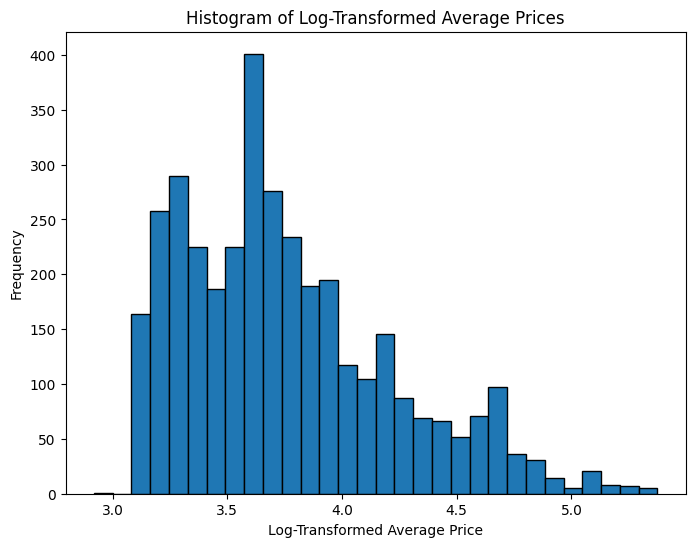

In [36]:
new_data['log_average'] = np.log1p(new_data['Average'])
plt.figure(figsize=(8, 6))
plt.hist(new_data['log_average'], bins=30, edgecolor='black')
plt.title('Histogram of Log-Transformed Average Prices')
plt.xlabel('Log-Transformed Average Price')
plt.ylabel('Frequency')
plt.show()

In [37]:
new_data

,Commodity,Date,Unit,Minimum,Maximum,Average,Season,log_average
0,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.00,Summer,3.401197
1,Onion Dry (Indian),2013-06-17,Kg,29.0,30.0,29.50,Summer,3.417727
2,Onion Dry (Indian),2013-06-18,Kg,33.0,35.0,34.00,Summer,3.555348
3,Onion Dry (Indian),2013-06-19,Kg,34.0,35.0,34.50,Summer,3.569533
4,Onion Dry (Indian),2013-06-20,Kg,35.0,36.0,35.50,Summer,3.597312
...,...,...,...,...,...,...,...,...
3577,Onion Dry (Indian),2023-09-24,KG,64.0,70.0,66.33,Fall,4.209606
3578,Onion Dry (Indian),2023-09-25,KG,68.0,70.0,69.20,Fall,4.251348
3579,Onion Dry (Indian),2023-09-26,KG,68.0,70.0,69.20,Fall,4.251348
3580,Onion Dry (Indian),2023-09-27,KG,70.0,74.0,71.20,Fall,4.279440


In [49]:
# Assuming 'model' is your trained Linear Regression model
# Assuming 'new_dataset' is your DataFrame with the provided structure

# Get unique commodities from the 'Commodity' column
commodities = new_data['Commodity'].unique()

# Get the latest date from your dataset
latest_date = pd.to_datetime(new_data['Date']).max()

next_year_dates = pd.date_range(start=latest_date + pd.DateOffset(days=1), periods=365, freq='D')  # Dates for the next year (365 days)
next_year_data = pd.DataFrame({
    'Date': next_year_dates,  # Include other columns similar to your 'onion_dry_data'
    # Fill other columns (Minimum, Maximum, day, month, year, Season_Fall, etc.) accordingly for the next year
    'Minimum': [0]* 365,  # Placeholder for Minimum values (NaN for prediction)
    'Maximum': [0]* 365,  # Placeholder for Maximum values (NaN for prediction)
    'log_average': [0]* 365
})

# Prepare features for prediction
X_next_year = next_year_data.drop(['Date'], axis=1)  # Assuming 'Date' is non-feature

# Predict prices for the next year
predicted_prices_next_year = model.predict(X_next_year)

# Add predicted prices to the DataFrame
next_year_data['Predicted_Prices'] = predicted_prices_next_year

# Display the predicted prices for the next year
print("Predicted prices for Onion Dry for the next year:")
print(next_year_data)


Predicted prices for Onion Dry for the next year:
          Date  Minimum  Maximum  log_average  Predicted_Prices
0   2023-09-29        0        0            0         -0.008763
1   2023-09-30        0        0            0         -0.008763
2   2023-10-01        0        0            0         -0.008763
3   2023-10-02        0        0            0         -0.008763
4   2023-10-03        0        0            0         -0.008763
..         ...      ...      ...          ...               ...
360 2024-09-23        0        0            0         -0.008763
361 2024-09-24        0        0            0         -0.008763
362 2024-09-25        0        0            0         -0.008763
363 2024-09-26        0        0            0         -0.008763
364 2024-09-27        0        0            0         -0.008763

[365 rows x 5 columns]
